<a href="https://colab.research.google.com/github/vardanagarwal/SIH/blob/master/clustering_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
zf = zipfile.ZipFile('/content/drive/My Drive/data/csv_files.zip', "r")
zf.extractall()

In [0]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [0]:
df = pd.read_csv('sky_normalization_for_clustering.csv')
df1 = df.iloc[:, 2:]

In [0]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df1) 
    kmeanModel.fit(df1)     
      
    distortions.append(sum(np.min(cdist(df1, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df1.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df1, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df1.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

# Using distortions


1 : 0.7614069713333542
2 : 0.3603748966887282
3 : 0.3124652268466712
4 : 0.2722286975979051
5 : 0.25036556877188093
6 : 0.23109486256169082
7 : 0.219017232445132
8 : 0.20810316244099825
9 : 0.19611870484377789


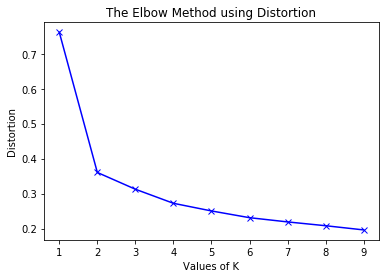

In [9]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

# Using Inertia

1 : 53651.60628999139
2 : 12856.764812077212
3 : 9762.547224154529
4 : 7274.617205185112
5 : 6290.021917916121
6 : 5468.3419198862
7 : 4898.934334555058
8 : 4353.648443040465
9 : 3909.7232227295644


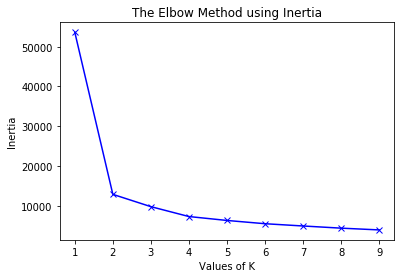

In [10]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

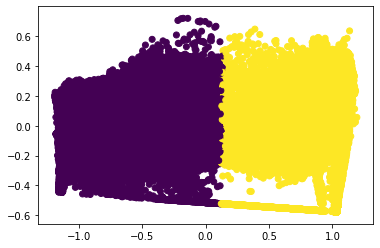

In [11]:
df = pd.read_csv('sky_normalization_for_clustering.csv')

df1 = df.iloc[:, 2:]

pca = PCA(n_components=2).fit_transform(df1)
kmeans = KMeans(n_clusters=2, max_iter=600)
kmeans.fit_transform(df1)
plt.figure('Kmeans with 2 clusters')
plt.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_)
plt.show()
df2 = pd.concat([df.iloc[:, 0:2], pd.DataFrame(kmeans.labels_)], axis=1)